# Local features

In [1]:
import numpy as np
import cv2 as cv

### Corner detection

#### Harris detector

In [2]:
filename = 'Images_01/chessboard_01.jpg'
img = cv.imread(filename)
img = cv.resize(img, (540, 540)) 
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
cv.waitKey(0)
cv.destroyAllWindows()

#### Shi-Tomasi detector

In [3]:
from __future__ import print_function

import argparse
import random as rng

source_window = 'Image'
maxTrackbar = 100
rng.seed(12345)
def goodFeaturesToTrack_Demo(val):
    maxCorners = max(val, 1)
    # Parameters for Shi-Tomasi algorithm
    qualityLevel = 0.01
    minDistance = 10
    blockSize = 3
    gradientSize = 3
    useHarrisDetector = False
    k = 0.04
    # Copy the source image
    copy = np.copy(src)
    # Apply corner detection
    corners = cv.goodFeaturesToTrack(src_gray, maxCorners, qualityLevel, minDistance, None,
        blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)
    # Draw corners detected
    print('** Number of corners detected:', corners.shape[0])
    radius = 4
    for i in range(corners.shape[0]):
        cv.circle(copy, (int(corners[i,0,0]), int(corners[i,0,1])), radius, (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)), cv.FILLED)
    # Show what you got
    cv.namedWindow(source_window)
    cv.imshow(source_window, copy)


# Load source image and convert it to gray
src = cv.imread('Images_01/chessboard_02.jpg')
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
# Create a window and a trackbar
cv.namedWindow(source_window)
maxCorners = 23 # initial threshold
cv.createTrackbar('Threshold: ', source_window, maxCorners, maxTrackbar, goodFeaturesToTrack_Demo)
cv.imshow(source_window, src)
goodFeaturesToTrack_Demo(maxCorners)
cv.waitKey()

** Number of corners detected: 23
** Number of corners detected: 23
** Number of corners detected: 22
** Number of corners detected: 21
** Number of corners detected: 20
** Number of corners detected: 19
** Number of corners detected: 18
** Number of corners detected: 17
** Number of corners detected: 16
** Number of corners detected: 15
** Number of corners detected: 14
** Number of corners detected: 13
** Number of corners detected: 12
** Number of corners detected: 11
** Number of corners detected: 10
** Number of corners detected: 9
** Number of corners detected: 8
** Number of corners detected: 7
** Number of corners detected: 6
** Number of corners detected: 5
** Number of corners detected: 4
** Number of corners detected: 3
** Number of corners detected: 2
** Number of corners detected: 1
** Number of corners detected: 1
** Number of corners detected: 1
** Number of corners detected: 2
** Number of corners detected: 3
** Number of corners detected: 5
** Number of corners detecte

-1

#### FAST detector

In [8]:
img = cv.imread('Images_01/chessboard_02.jpg',0) # `<opencv_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create(threshold=20)
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imshow('FAST true', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imshow('FAST false', img3)

cv.waitKey(0)
cv.destroyAllWindows()

Threshold: 20
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 387
Total Keypoints without nonmaxSuppression: 1758


### Blob detection

#### SIFT

In [2]:
img = cv.imread('Images_01/corridor_01.jpg')
img = cv.resize(img, (540, 540))
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imshow('sift keypoints',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
img = cv.imread('Images_01/corridor_01.jpg')
img = cv.resize(img, (540, 540))
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imshow('sift keypoints',img)
cv.waitKey(0)
cv.destroyAllWindows()

#### ORB

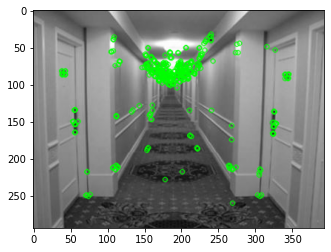

(<matplotlib.image.AxesImage at 0x1b33abf4f10>, None)

In [4]:
from matplotlib import pyplot as plt
img = cv.imread('Images_01/corridor_01.jpg',0)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

### Matching

#### matching with ORB

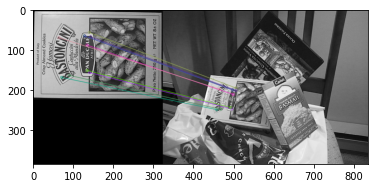

(<matplotlib.image.AxesImage at 0x1b33ae2e6e0>, None)

In [5]:
img1 = cv.imread('Images_01/match_box01a_1.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('Images_01/match_box01a_2.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

#### brute-force matching

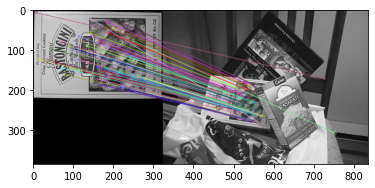

(<matplotlib.image.AxesImage at 0x1b349b61a80>, None)

In [6]:
img1 = cv.imread('Images_01/match_box01a_1.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('Images_01/match_box01a_2.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

#### FLANN matcher

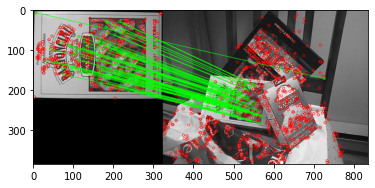

(<matplotlib.image.AxesImage at 0x1b349b45120>, None)

In [7]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
                   
img1 = cv.imread('Images_01/match_box01a_1.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('Images_01/match_box01a_2.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

### Homography - localizing objects

In [14]:
img_object = cv.imread('Images_01/match_box01a_1.png', cv.IMREAD_GRAYSCALE)
img_scene = cv.imread('Images_01/match_box01a_2.png', cv.IMREAD_GRAYSCALE)

#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors
minHessian = 400
detector = cv.SIFT_create()
keypoints_obj, descriptors_obj = detector.detectAndCompute(img_object, None)
keypoints_scene, descriptors_scene = detector.detectAndCompute(img_scene, None)
#-- Step 2: Matching descriptor vectors with a FLANN based matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors_obj, descriptors_scene, 2)
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.75
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)
#-- Draw matches
img_matches = np.empty((max(img_object.shape[0], img_scene.shape[0]), img_object.shape[1]+img_scene.shape[1], 3), dtype=np.uint8)
cv.drawMatches(img_object, keypoints_obj, img_scene, keypoints_scene, good_matches, img_matches, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#-- Localize the object
obj = np.empty((len(good_matches),2), dtype=np.float32)
scene = np.empty((len(good_matches),2), dtype=np.float32)
for i in range(len(good_matches)):
    #-- Get the keypoints from the good matches
    obj[i,0] = keypoints_obj[good_matches[i].queryIdx].pt[0]
    obj[i,1] = keypoints_obj[good_matches[i].queryIdx].pt[1]
    scene[i,0] = keypoints_scene[good_matches[i].trainIdx].pt[0]
    scene[i,1] = keypoints_scene[good_matches[i].trainIdx].pt[1]
H, _ =  cv.findHomography(obj, scene, cv.RANSAC)
#-- Get the corners from the image_1 ( the object to be "detected" )
obj_corners = np.empty((4,1,2), dtype=np.float32)
obj_corners[0,0,0] = 0
obj_corners[0,0,1] = 0
obj_corners[1,0,0] = img_object.shape[1]
obj_corners[1,0,1] = 0
obj_corners[2,0,0] = img_object.shape[1]
obj_corners[2,0,1] = img_object.shape[0]
obj_corners[3,0,0] = 0
obj_corners[3,0,1] = img_object.shape[0]
scene_corners = cv.perspectiveTransform(obj_corners, H)
#-- Draw lines between the corners (the mapped object in the scene - image_2 )
cv.line(img_matches, (int(scene_corners[0,0,0] + img_object.shape[1]), int(scene_corners[0,0,1])),\
    (int(scene_corners[1,0,0] + img_object.shape[1]), int(scene_corners[1,0,1])), (0,255,0), 4)
cv.line(img_matches, (int(scene_corners[1,0,0] + img_object.shape[1]), int(scene_corners[1,0,1])),\
    (int(scene_corners[2,0,0] + img_object.shape[1]), int(scene_corners[2,0,1])), (0,255,0), 4)
cv.line(img_matches, (int(scene_corners[2,0,0] + img_object.shape[1]), int(scene_corners[2,0,1])),\
    (int(scene_corners[3,0,0] + img_object.shape[1]), int(scene_corners[3,0,1])), (0,255,0), 4)
cv.line(img_matches, (int(scene_corners[3,0,0] + img_object.shape[1]), int(scene_corners[3,0,1])),\
    (int(scene_corners[0,0,0] + img_object.shape[1]), int(scene_corners[0,0,1])), (0,255,0), 4)
#-- Show detected matches
cv.imshow('Good Matches & Object detection', img_matches)
cv.waitKey(0)
cv.destroyAllWindows()